In [1]:
import pandas as pd
from tqdm import trange, tqdm
# Credits to https://github.com/galtay/hilbert_curve
import hilbert
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def isprime(i, primes=[2]):
    if i in primes:
        return True
    elif i < max(primes):
        return False
    else:
        for x in range(2, int(i**0.5)+1):
            if i % x == 0:
                return False
        primes.append(i)
        return True
def issquare(i):
    s = i**0.5
    return s == int(s)

def isfib(i, seq=[1, 1]):
    if i > seq[-1]:
        # Generate uptil i
        while seq[-1] < i:
            seq.append(seq[-1] + seq[-2])
    return i in seq

# Primes on a Hilbert curve

In [7]:
def mask(i):
    prime = isprime(i)
    square = issquare(i)
    even = i % 2 == 0
    fib = isfib(i)
    
    color = 'white'
    if even:
        color = 'white'
    if square:
        color = 'orange'
    if fib:
        color = 'green'
    if prime:
        color = 'black'
    return color
    

N = 2 # number of dimensions
p = 8 # number of iterations
npts = 2**(N*p)
pts, colors_mask = [], []


side = 2**p - 1
cmin = -0.5
cmax = side + 0.5

print(side, cmin, cmax)
for i in trange(npts, mininterval=5):
    pts.append(hilbert.coordinates_from_distance(i, p, N))
    colors_mask.append(mask(i))


255 -0.5 255.5


100%|██████████████████████████████████| 65536/65536 [00:33<00:00, 1947.70it/s]


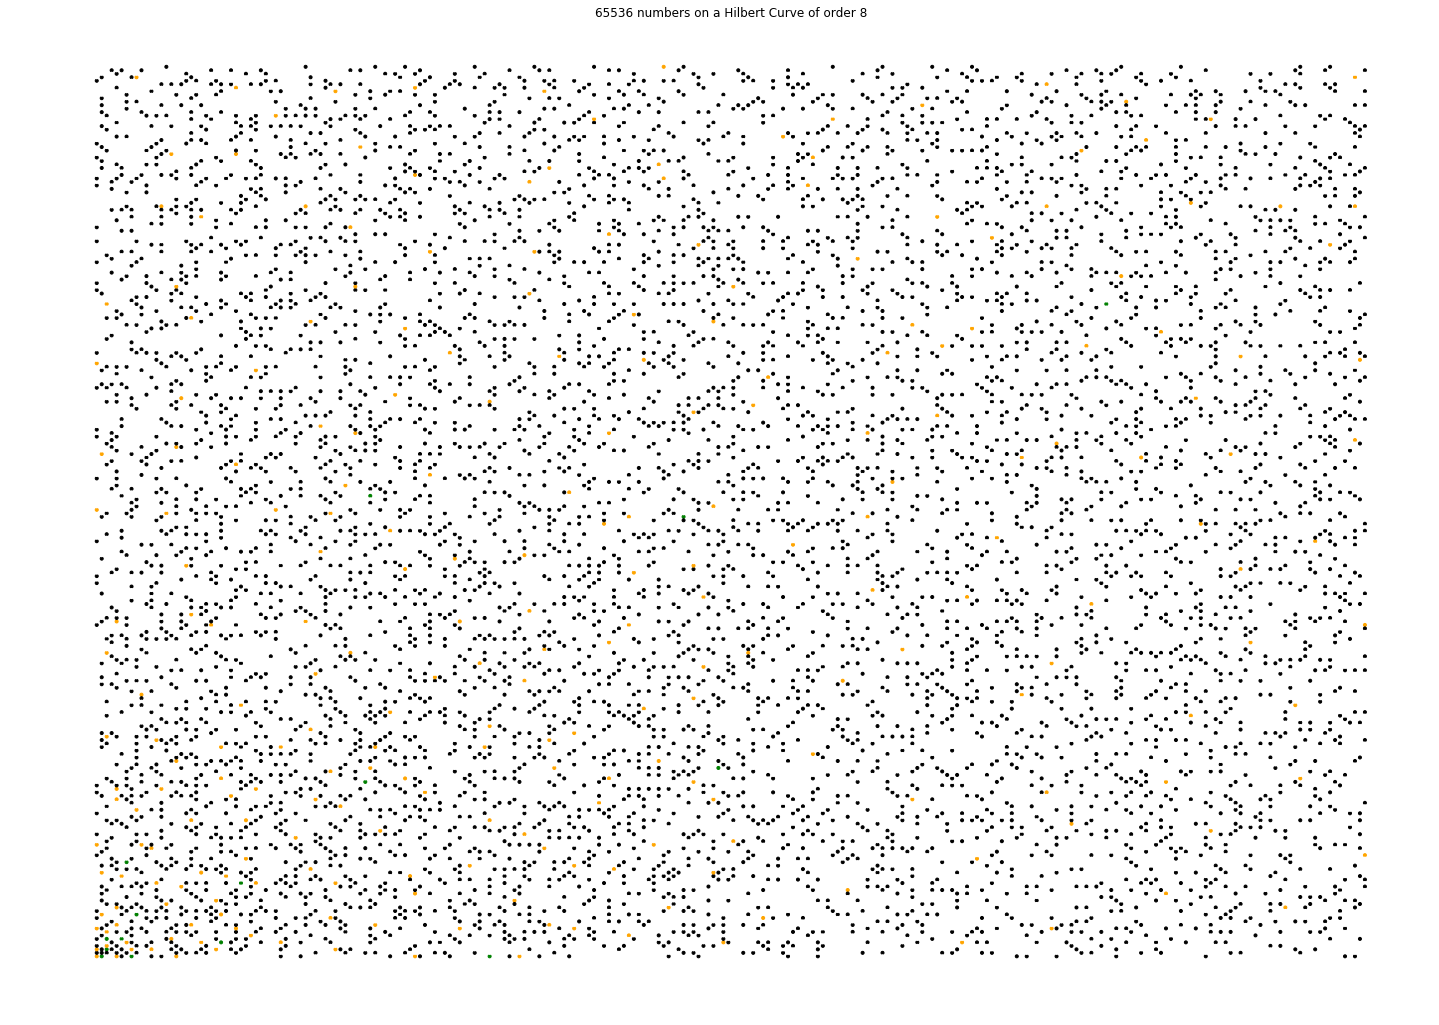

In [8]:
pts = np.array(pts)
x, y = pts[:, 0], pts[:, 1]
plt.figure(figsize=(25, 18))
plt.scatter(x, y, marker='.', color=colors_mask)
plt.axis('off')
plt.title('{} numbers on a Hilbert Curve of order {}'.format(npts, p))


# Sacks Spiral

In [11]:
pi, sqrt = np.pi, np.sqrt

i = np.arange(100000)

x = -cos(sqrt(i)*2*pi)*sqrt(i)
y = sin(sqrt(i)*2*pi)*sqrt(i) 
cols = list(map(mask, i))

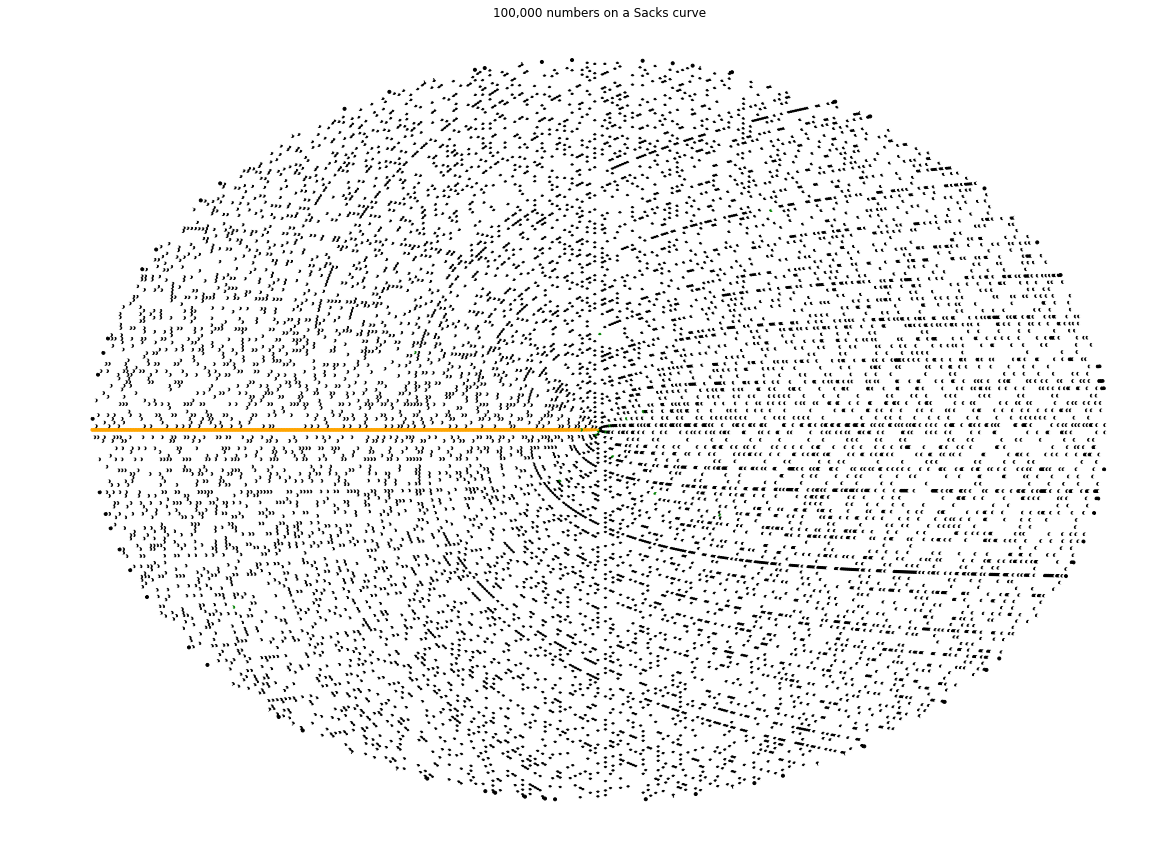

In [12]:
plt.figure(figsize=(20, 15))
plt.scatter(x, y, marker='.', color=cols)
plt.grid('off')
plt.axis('off')
plt.title('{:,} numbers on a Sacks curve'.format(i.shape[0]))